In [1]:
import cv2
from os.path import join
import numpy as np
from os import listdir
categories = []
data = []
for category in listdir("data"):
    temp = []
    for f in listdir(join("data",category)):
        temp.append(cv2.equalizeHist(cv2.imread(join("data",category,f),cv2.CV_LOAD_IMAGE_GRAYSCALE)))
    data.append(temp)
    categories.append(category)
descriptors_orb = []
# Detecting SIFT points for all the images
descriptors_by_images_orb = []
lighting_hist = [[cv2.calcHist(d2,[0],None,[256],[0,256]) for d2 in d] for d in data]
labels = []
orb = cv2.ORB(edgeThreshold=2)

# compute the descriptors with ORB
for k,c in enumerate(data):
    for img in c:
        kp = orb.detect(img,None)
        kp, des = orb.compute(img, kp)
        temp = []
        for d in des:
            descriptors_orb.append(d)
            temp.append(d)
        descriptors_by_images_orb.append(temp)
        labels.append(k)


In [3]:
n_clusters = 50
from sklearn.cluster import KMeans
km = KMeans(n_clusters=n_clusters)
km.fit(descriptors_orb)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=50, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [4]:
hist_by_images = []
for desp_set in descriptors_by_images_orb:
    hist = [0 for i in range(n_clusters)]
    for d in desp_set:
        hist[km.predict(d)[0]] += 1
    hist_by_images.append(hist)

/home/pitodogo/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:797: RuntimeWarning: Got data type uint8, converted to float to avoid overflows
  X = self._check_test_data(X)


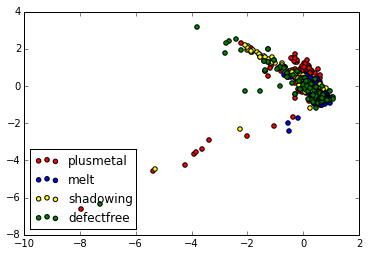

In [8]:
from __future__ import division
%matplotlib inline
normalized_hist_by_images = [np.asarray(h)/sum(h) for h in hist_by_images]
from sklearn.decomposition import PCA
pca = PCA(n_components=2,whiten=True)
pca_hist = pca.fit_transform(np.asarray(normalized_hist_by_images))

import matplotlib.pyplot as plt
color = ["red","blue","yellow","green"]
rlt = []
for k in range(4):
    temp = np.asarray([p for i,p in enumerate(pca_hist) if labels[i]==k])
    X = temp[:,1]
    Y = temp[:,0]
    rlt.append(plt.scatter(X,Y,c=color[k]))
plt.legend(rlt,categories,loc=3)


In [3]:
All_Hists = []
labels = []
color = ["Red","Yellow","Orange","Indigo"]
for k,hist in enumerate(hist_no_he):
    for h in hist:
        All_Hists.append(h)
        labels.append(k)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
overall_data = np.reshape(np.asarray(All_Hists),[528,256])
pca_histogram = pca.fit_transform(overall_data)
results = []
import matplotlib.pyplot as plt
for k in range(4):
    #if(categories[k]!="melt"):
    #    continue
    temp = np.asarray([h for i,h in enumerate(pca_histogram) if (labels[i]==k)])
    X = temp[:,0]
    Y = temp[:,1]
    results.append(plt.scatter(X,Y,c=color[k]))
plt.legend(results,categories)
plt.show()
    

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, whiten=True)
pca.fit(overall_data)
plt.plot(pca.explained_variance_ratio_)
plt.show()